In [30]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

In [10]:




def neighbourhood_points(X, x_centroid, look_distance ):
    eligible_X = []
    for x in X:
        distance_between = distance(x, x_centroid)
        #print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= look_distance:
            eligible_X.append(x)
    eligible_X=np.asarray(eligible_X)
    return eligible_X

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distance / bandwidth)) ** 2)



In [14]:
def _shift_point(points,point, kernel_bandwidth, look_distance):
    
        new_x=[]
        #for i, x in enumerate(points):
        ### Step 1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.
        neighbours = neighbourhood_points(points, point, look_distance)
       
        #print('[%s] has neighbours [%d]' % (point, len(neighbours)))
        
        ### Step 2. For each datapoint x ∈ X, calculate the mean shift m(x).
        numerator = 0
        denominator = 0
        #numerator=np.asarray(numerator)
        #denominator=np.asarray(denominator)
        for neighbour in neighbours:
            #neighbour=np.asarray(neighbour)
            #print(neighbour)
            lo_distance = distance(neighbour, point)
            weight = gaussian_kernel(lo_distance, kernel_bandwidth)
            #print(weight)
            numerator = numerator + (weight * neighbour)
            #print(numerator)
            denominator = denominator + weight
            #print(denominator)
        
        new_x = numerator / denominator
        point= new_x
        #print('new point is [%s]'% (new_x))
        return point
    


def fit( points, kernel_bandwidth, look_distance,STOP_THRESHOLD):

        shift_points = points
        shifting = [True] * points.shape[0]

        while True:
            max_dist = 0
            for i in range(0, len(shift_points)):
                if not shifting[i]:
                    continue
                p_shift_init = shift_points[i].copy()
                shift_points[i] = _shift_point(points,shift_points[i], kernel_bandwidth,look_distance)
                dist = distance(shift_points[i], p_shift_init)
                max_dist = max(max_dist, dist)
                shifting[i] = dist > STOP_THRESHOLD
                print('Iteration ongoing')
                

            if(max_dist < STOP_THRESHOLD):
                break
        #cluster_ids = self._cluster_points(shift_points.tolist())
        return shift_points 
    #, cluster_ids
    
    
def _cluster_points( points,CLUSTER_THRESHOLD):
        cluster_ids = []
        cluster_idx = 0
        cluster_centers = []
        z=points

        for i, point in enumerate(z):
            if(len(cluster_ids) == 0):
                cluster_ids.append(cluster_idx)
                cluster_centers.append(point)
                cluster_idx += 1
            else:
                for center in cluster_centers:
                    dist = distance(point, center)
                    if(dist < CLUSTER_THRESHOLD):
                        cluster_ids.append(cluster_centers.index(center))
                        break
                if(len(cluster_ids) < i + 1):
                    cluster_ids.append(cluster_idx)
                    cluster_centers.append(point)
                    cluster_idx += 1
        return cluster_ids

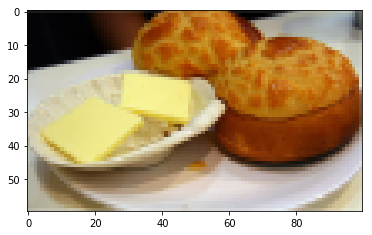

In [7]:
image = Image.open('C:/Users/mtech _1/Desktop/gsoc/bread.jpg')
image = np.array(image)
im_2 = cv2.resize(image, (100,60) , interpolation = cv2.INTER_AREA)
plt.imshow(im_2)

In [8]:
flat_image=np.reshape(im_rescale, [-1, 3])
new_image=np.reshape(image,[-1,3])
flat_image.shape

(6000, 3)

In [16]:

shift_point= fit(flat_image, 5,50,10)

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing


In [42]:
clusters=  _cluster_points( shift_point.tolist(),CLUSTER_THRESHOLD=70)

In [43]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [44]:
len(clusters)

6000

(-0.5, 99.5, 59.5, -0.5)

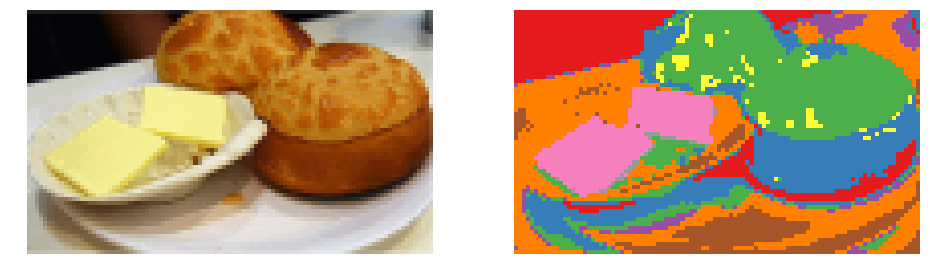

In [45]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(im_2)
plt.axis('off')
plt.subplot(1, 2, 2)

plt.imshow(np.reshape(clusters, [60,100]) ,cmap= 'Set1')
plt.axis('off')

In [90]:
car = Image.open('C:/Users/mtech _1/Desktop/gsoc/car.jpg')
car = np.array(car)
car.shape


(710, 1024, 3)

In [91]:
car_2 = cv2.resize(car, (100,60) , interpolation = cv2.INTER_AREA)


In [92]:
flat_car=np.reshape(car_2, [-1, 3])
flat_car.shape

(6000, 3)

In [50]:

shift=fit(flat_car, 25,100,20)

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration ongoing
Iteration 

In [86]:
clusters2=  _cluster_points( shift.tolist(),CLUSTER_THRESHOLD=70)

In [87]:
np.unique(clusters2)

array([0, 1, 2, 3, 4, 5])

(-0.5, 99.5, 59.5, -0.5)

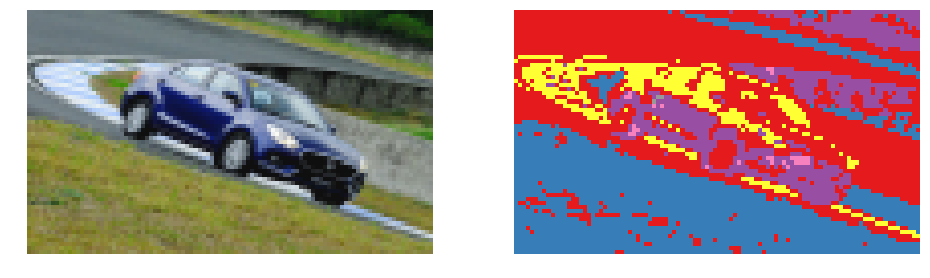

In [93]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(car_2)
plt.axis('off')
plt.subplot(1, 2, 2)

plt.imshow(np.reshape(clusters2, [60,100]) ,cmap= 'Set1')
plt.axis('off')